<a href="https://colab.research.google.com/github/vifirsanova/ml-course/blob/main/tutorials/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра с NumPy

- https://www.deeplearningbook.org/contents/linear_algebra.html


## Основные объекты линейной алгебры

**Скаляр** (скалярная величина) — это простое число, которое можно представить в виде переменной в Python:

In [1]:
scalar = 5  # Пример скаляра

**np.ScalarType**

В NumPy для скалярных величин используется `np.ScalarType` — обобщенный тип, который включает все допустимые скалярные типы данных:

- `np.int32`
- `np.float64`
- `np.complex128`

In [2]:
import numpy as np

def process_scalar(scalar: np.ScalarType) -> np.ScalarType:
    return scalar * 2

process_scalar(3.14)  # 6.28

6.28

- https://peps.python.org/pep-3107/

В этом примере мы с вами использовали новый способ оформления функций, `function annotation`

Для дополнительного документирования функции вы можете подписать *аннотации* для аргументов ваших функций (например, описать ограничения на тип данных):

```
def foo(a: expression, b: expression = 5):
    ...
```

А также можно подписать аннотации (например, ожидаемый тип вывода) для вывода вашей функции через `->`:

```
def sum() -> expression:
    ...
```

In [ ]:
"""
Напишите функцию, которая принимает два числа и возвращает их сумму.
Используйте аннотации типов.
"""

### ваш код здесь ###

**Вектор** — это одномерный упорядоченный массив чисел.

В NumPy вектор можно представить как одномерный массив или двумерный массив с одним столбцом/строкой.

In [5]:
import numpy as np

# Вектор-строка
v_row = np.array([1, 2, 3])

# Вектор-столбец
v_col = np.array([[1], [2], [3]])

print('Вектор-строка')
print(v_row)
print('\n-----------------\n')
print('Вектор-столбец')
print(v_col)

Вектор-строка
[1 2 3]

-----------------

Вектор-столбец
[[1]
 [2]
 [3]]


Вектор задает точку в пространстве: каждый элемент вектора представляет расположение точки **в системе координат**.

Если мы работаем с длинными векторами при обработке данных, то мы располагаем точки в **многомерном пространстве**.

Чем длинее вектор, тем больше признаков мы можем закодировать.

*Например, одним признаком может быть частотность данного слова в книге 1. Другим признаком -- частотность того же слова в книге 2. Третьим признаком -- частотность того же слова в книге 3.*

Вектора удобно использовать, потому что:

1. компактный способ хранения и представления данных
2. в один элемент вектора можно заложить любую информацию (частотность, глубина цвета, яркость...)
3. легко визуаилизировать
4. можно создать пространство для решения конечной задачи, например, для построения гиперплоскости для разделения признаков

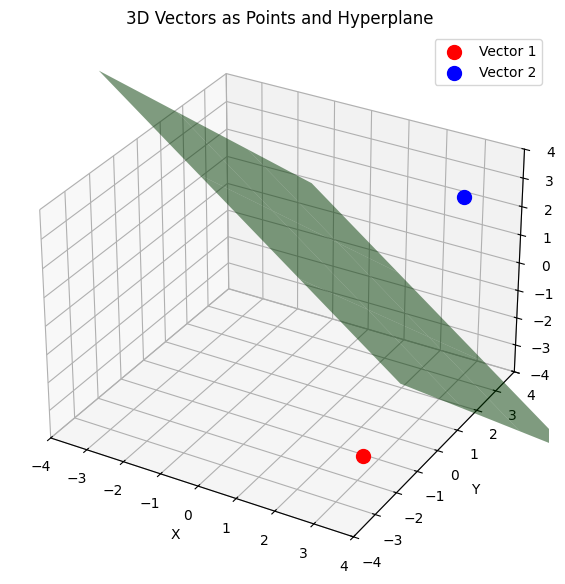

In [33]:
import matplotlib.pyplot as plt

# Создаем изображение и 3-хмерную систему координат
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Это вектора признаков двух элементов, например, значения цветов RGB
v1_3d = np.array([1, 2, -7])
v2_3d = np.array([2, 5, 1])

# Наносим точки на график
ax.scatter(v1_3d[0], v1_3d[1], v1_3d[2], color='r', label='Vector 1', s=100)
ax.scatter(v2_3d[0], v2_3d[1], v2_3d[2], color='b', label='Vector 2', s=100)

# Моделируем гиперплоскость, которая разделит два признака
# В нашем игрушечном примере всего 2 элемента, но для машинного обучения
# мы нанесем на плоскость множество элементов, а значения, задающие гиперплоскость
# будут подбираться автоматически в процессе обратного распространения ошибки
x_vals = np.linspace(-5, 3, 4)
y_vals = np.linspace(0, 10, 4)

# Уравнение гиперплоскости: x + y + z = 1
# в ML у нас будет своя функция, параметры которой мы будем тюнить в процессе обучения
# создаем матрицу координат с помощью np.meshgrid
# (эта функция накладывает значения на "решетку", чтобы получилась система координат)
# https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-numpy
X, Y = np.meshgrid(x_vals, y_vals)
Z = 1 - X - Y

# Рисуем гиперплоскость
ax.plot_surface(X, Y, Z, color='g', alpha=0.5)

# Добавляем метки и прочую красоту
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)
ax.set_title("3D Vectors as Points and Hyperplane")
ax.legend(["Vector 1", "Vector 2"])

# Показываем график
plt.show()

**Матрица** — это двумерный массив, по сути, таблица. Каждый элемент определяется двумя индексами: номером строки и номером столбца.

**Векторные представления слов**:

   - **Word embeddings**:
   
   Каждый токен (слово) представляется в виде вектора фиксированной длины (например, 300).
   
   Все слова из корпуса текстов представляем как строки в матрице размером `N x D`, где `N` — количество слов, а `D` — размерность векторов.

   - **TF-IDF**:
   
   Текстовые данные представляются в виде матрицы, где строки — это документы, а столбцы — уникальные слова, которые встречаются в этих документах.
   
   Значение в ячейке матрицы позволяет оценить важность слова для документа, используется в информационном поиске (search engines).

**В ML**:

   - **Веса и параметры нейронных сетей**:
   
   В нейронных сетях веса между слоями хранятся в виде матриц. Например, если один слой сети имеет `M` входных и `N` выходных нейронов, то веса между слоями будут храниться в матрице размером `M x N`.

   - **Механизмы внимания**:
   
   Матрица внимания в трансформерах вычисляет силу связи между словами на нескольких уровнях, интуитивно, создавая представления о том, на какие части входного текста нужно обращать внимание для решения задачи.

**Снижение размерности**:

   - **PCA (Principal Component Analysis)**

   - **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

   - **Тематическое моделирование (например, LDA)**

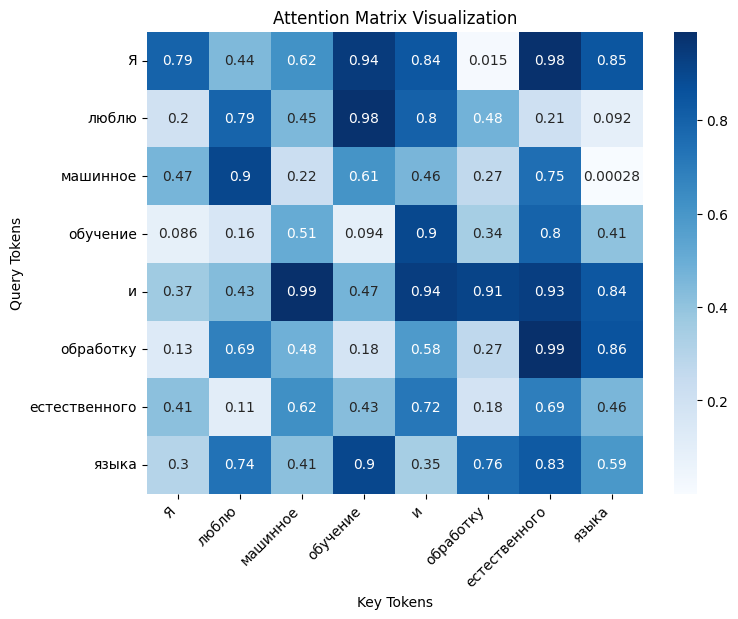

In [34]:
import seaborn as sns

# Создадим случайную матрицу внимания (пример для 8 токенов на уровне слов)
attention_matrix = np.random.rand(8, 8)

# Подписи токенов (для примера)
tokens = ["Я", "люблю", "машинное", "обучение", "и", "обработку", "естественного", "языка"]

# Визуализация attention
plt.figure(figsize=(8, 6))
sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens, yticklabels=tokens)
plt.title("Attention Matrix Visualization")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


**Рекомендательные системы**:
   
В рекомендательных системах данные о пользователях и товарах часто представляются в виде матрицы, где строки — это пользователи, а столбцы — товары.
   
Элементы матрицы могут представлять взаимодействие, например, рейтинг товара пользователем или покупку.
   
Модели, такие как **SVD (сингулярное разложение матрицы)**, используют матричные операции для предсказания недостающих значений в матрице, помогая генерировать рекомендации.

https://developers.google.com/machine-learning/recommendation/overview/types

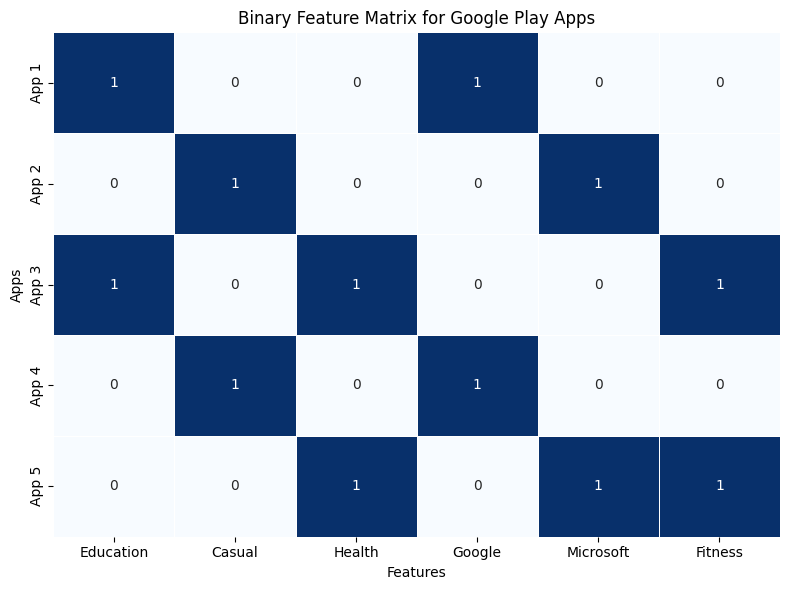

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Приложения и их фичи
apps = ['App 1', 'App 2', 'App 3', 'App 4', 'App 5']
features = ['Education', 'Casual', 'Health', 'Google', 'Microsoft', 'Fitness']

# Бинарная матрица признаков (1 = у приложения есть фича, 0 = нет фичи)
feature_matrix = np.array([
    [1, 0, 0, 1, 0, 0],  # App 1 (Education, Google)
    [0, 1, 0, 0, 1, 0],  # App 2 (Casual, Microsoft)
    [1, 0, 1, 0, 0, 1],  # App 3 (Education, Health, Fitness)
    [0, 1, 0, 1, 0, 0],  # App 4 (Casual, Google)
    [0, 0, 1, 0, 1, 1]   # App 5 (Health, Microsoft, Fitness)
])

# DataFrame
feature_df = pd.DataFrame(feature_matrix, columns=features, index=apps)

# Feature Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(feature_df, annot=True, cmap="Blues", cbar=False, linewidths=0.5)
plt.title("Binary Feature Matrix for Google Play Apps")
plt.xlabel("Features")
plt.ylabel("Apps")
plt.tight_layout()
plt.show()

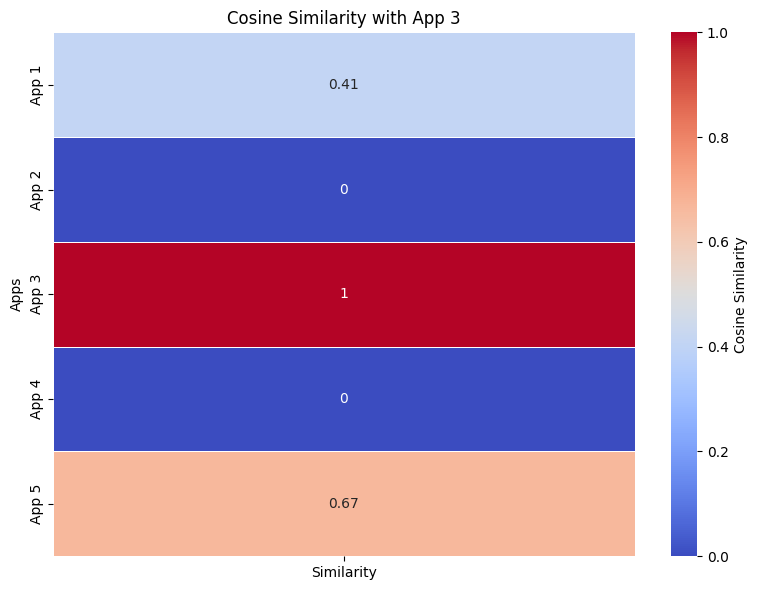

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Считаем косинусное сходство App 3 с другими сущностями
feature_vectors = feature_df.values
app_3_vector = feature_vectors[2].reshape(1, -1)  # App 3
similarities = cosine_similarity(app_3_vector, feature_vectors)

# DataFrame со скорами косинусного сходства
similarity_df = pd.DataFrame(similarities.T, columns=['Similarity'], index=apps)

# Cosine Similarity Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Cosine Similarity'}, linewidths=0.5)
plt.title("Cosine Similarity with App 3")
plt.ylabel("Apps")
plt.tight_layout()
plt.show()

**Косинусное сходство** определяет, насколько два вектора схожи, на основе угла между ними.

Области применения:

- анализ текстов
- рекомендательные системы
- любые парадигмы, где важна схожесть объектов

Косинусное сходство измеряет, насколько два вектора направлены в одном направлении, а не их длину или масштаб (ср. Евклидово расстояние).

Косинусное сходство между двумя векторами $A$ и $B$ вычисляется по формуле:

$\text{cosine_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}$

где:
- $A cdot B$ — скалярное произведение (dot product) векторов $A$ и $B$
- $A$ — норма (или длина) вектора $A$
- $B$ — норма (или длина) вектора $B$

In [41]:
import numpy as np

# Векторы A и B
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Скалярное произведение
dot_product = np.dot(A, B)

# Норма векторов
norm_A = np.linalg.norm(A)
norm_B = np.linalg.norm(B)

# Косинусное сходство
cosine_similarity = dot_product / (norm_A * norm_B)

print(f"Косинусное сходство между A и B: {cosine_similarity:.4f}")

Косинусное сходство между A и B: 0.9746


In [42]:
# Векторы для приложений
app_1 = np.array([1, 0, 1])  # Приложение 1 (категории: Education, Fitness)
app_2 = np.array([0, 1, 1])  # Приложение 2 (категории: Casual, Fitness)
app_3 = np.array([1, 0, 1])  # Приложение 3 (категории: Education, Fitness)

# Косинусное сходство между приложениями 1 и 2
similarity_1_2 = np.dot(app_1, app_2) / (np.linalg.norm(app_1) * np.linalg.norm(app_2))
# Косинусное сходство между приложениями 1 и 3
similarity_1_3 = np.dot(app_1, app_3) / (np.linalg.norm(app_1) * np.linalg.norm(app_3))

print(f"Косинусное сходство между Приложением 1 и Приложением 2: {similarity_1_2:.4f}")
print(f"Косинусное сходство между Приложением 1 и Приложением 3: {similarity_1_3:.4f}")

Косинусное сходство между Приложением 1 и Приложением 2: 0.5000
Косинусное сходство между Приложением 1 и Приложением 3: 1.0000


**Скалярное произведение (dot product)**

Скалярное произведение двух векторов $A = [a_1, a_2, \dots, a_n]$ и $B = [b_1, b_2, \dots, b_n]$ вычисляется как сумма произведений соответствующих элементов этих векторов:

$A \cdot B = a_1 \cdot b_1 + a_2 \cdot b_2 + \dots + a_n \cdot b_n$

$A = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$

$B = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$

**Вычисляем скалярное произведение**:

$A \cdot B = (1 \cdot 4) + (2 \cdot 5) + (3 \cdot 6) = 4 + 10 + 18 = 32$

Операция, когда мы кладем матрицу "на бочок", чтобы произвести умножение, называется **транспонирование**.

In [45]:
a = np.array([[1, 2], [3, 4]])
a
a.T # транспонировали матрицу

array([[1, 3],
       [2, 4]])

**Тензор** — это обобщение матрицы на более высокие размерности.

Если матрица — это двумерный массив, то тензор может быть сколько-угодно-мерным.

- Вектор — это тензор первого порядка (одномерный).
- Матрица — это тензор второго порядка (двумерный).
- Многомерный массив — это тензор третьего и более порядков.

Тензоры спасают нас в глубоком обучении. Они используются для представления данных с естественным сигналом (изображения, текст, аудио и другие многомерные данные).

- https://habr.com/ru/companies/avito/articles/491942/ - вся эта скалярная история на практике

3D тензор:
[[[0.96119056 0.90535064 0.19579113]
  [0.0693613  0.100778   0.01822183]
  [0.09444296 0.68300677 0.07118865]]

 [[0.31897563 0.84487531 0.02327194]
  [0.81446848 0.28185477 0.11816483]
  [0.69673717 0.62894285 0.87747201]]

 [[0.73507104 0.80348093 0.28203457]
  [0.17743954 0.75061475 0.80683474]
  [0.99050514 0.41261768 0.37201809]]]


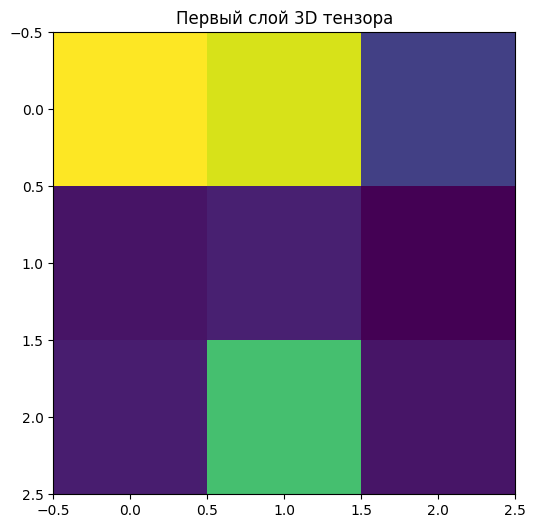

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем 3D тензор (3x3x3)
tensor = np.random.random((3, 3, 3))

print("3D тензор:")
print(tensor)

# Визуализация с помощью matplotlib для первого слоя тензора
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.imshow(tensor[0], cmap='viridis', interpolation='none')
axes.set_title('Первый слой 3D тензора')
plt.show()

- https://www.deeplearningbook.org/contents/linear_algebra.html - продолжаем знакомство с линейной алгеброй